## Redes Neurais Artificiais 2021.1

- **Disciplina**: Redes Neurais Artificiais 2021.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta segunda parte do Projeto Prático 2.2 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import math as mt
from imblearn.under_sampling import NearMiss
from warnings import filterwarnings
filterwarnings('ignore')

1. Abra a base de dados em questão

In [41]:
data_all = pd.read_csv('data/covtype.csv')


2. Elimine todas as colunas relativas aos atributos categóricos

In [42]:
categoricos = list(filter(lambda x: (x.startswith('Wilderness_Area') or x.startswith('Soil_Type')), data_all.columns.to_list()))

In [43]:
data = data_all.drop(categoricos, axis=1)

In [44]:
data.shape

(581012, 11)

In [45]:
data.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Cover_Type                            int64
dtype: object


3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X

In [46]:
X = data.iloc[:, :(data.shape[1] - 1)]
y = data.iloc[:, -1:]

nm1 = NearMiss(version=1)
X_resampled_nm1, y_resampled = nm1.fit_resample(X, y)

X = X_resampled_nm1
y = y_resampled


4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)


5. Efetue o escalonamento dos atributos

In [9]:
X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  

In [10]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, activation='relu', solver='adam', verbose=True, random_state=1)

In [11]:
mlp.fit(X_train_std, y_train.values.ravel())

Iteration 1, loss = 2.21447723
Iteration 2, loss = 1.94400272
Iteration 3, loss = 1.77019974
Iteration 4, loss = 1.62579117
Iteration 5, loss = 1.49214005
Iteration 6, loss = 1.37529111
Iteration 7, loss = 1.27653501
Iteration 8, loss = 1.19636778
Iteration 9, loss = 1.13256787
Iteration 10, loss = 1.08051907
Iteration 11, loss = 1.03717392
Iteration 12, loss = 1.00009078
Iteration 13, loss = 0.96791218
Iteration 14, loss = 0.93909701
Iteration 15, loss = 0.91287903
Iteration 16, loss = 0.88884546
Iteration 17, loss = 0.86703478
Iteration 18, loss = 0.84693598
Iteration 19, loss = 0.82872956
Iteration 20, loss = 0.81163038
Iteration 21, loss = 0.79588132
Iteration 22, loss = 0.78160997
Iteration 23, loss = 0.76811067
Iteration 24, loss = 0.75601877
Iteration 25, loss = 0.74413488
Iteration 26, loss = 0.73354161
Iteration 27, loss = 0.72352787
Iteration 28, loss = 0.71376392
Iteration 29, loss = 0.70491903
Iteration 30, loss = 0.69662127
Iteration 31, loss = 0.68850440
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, random_state=1,
              verbose=True)

6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  

In [12]:
y_pred = mlp.predict(X_test_std)

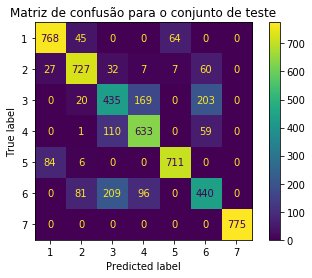

In [13]:
matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Matriz de confusão para o conjunto de teste')
plt.show(matrix)
plt.show()

In [14]:
print('Acurácia:', accuracy_score(y_pred, y_test))
print('F1-Score:', f1_score(y_pred,y_test, average='weighted'))
print('Precisão:', precision_score(y_pred, y_test, average='weighted'))
print('Revocação:', recall_score(y_pred, y_test, average='weighted'))

Acurácia: 0.7781244583116658
F1-Score: 0.7798074734237663
Precisão: 0.7827251344376541
Revocação: 0.7781244583116658


7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 15 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  

In [3]:
def evaluate_mlp(*args, N=1, train_size=.7, **kwargs):
  X, y = args
  f1_scores = []
  acuracias = []
  mlp = None
  for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, shuffle=True)

    X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
    X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

    mlp = MLPClassifier(**kwargs)
    mlp.fit(X_train_std, y_train)

    y_pred=mlp.predict(X_test_std)

    acuracias.append(accuracy_score(y_pred, y_test))
    f1_scores.append(f1_score(y_pred, y_test, average='weighted'))
  return (mlp.get_params(), np.mean(acuracias), np.std(acuracias), np.mean(f1_scores), np.std(f1_scores))

In [16]:
N=15
mlp_params_adam = mlp.get_params()
mlp_params_adam['verbose'] = False

In [17]:
_, adam_acc_mean, adam_acc_std, adam_f1_mean, adam_f1_std = evaluate_mlp(X, y, N=N, **mlp_params_adam)

23m0s
Acurácia - Média:  0.7155972706688697
Acurácia - Desvio Padrão :  0.002155649672444464
F1-Score - Média:  0.5168943657692464
F1-Score - Desvio Padrão:  0.008230984559501947

23m56s
Acurácia - Média:  0.7152962639985313
Acurácia - Desvio Padrão :  0.00238822397143433
F1-Score - Média:  0.5203633874934127
F1-Score - Desvio Padrão:  0.01141224018916451

In [18]:
print('Acurácia - Média: ', adam_acc_mean)
print('Acurácia - Desvio Padrão : ', adam_acc_std)
print('F1-Score - Média: ', adam_f1_mean)
print('F1-Score - Desvio Padrão: ', adam_f1_std)

Acurácia - Média:  0.7844918241174093
Acurácia - Desvio Padrão :  0.004621598126468234
F1-Score - Média:  0.7860139434476939
F1-Score - Desvio Padrão:  0.004663513419293073


8. Repita por 15 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino

In [19]:
param_keys = ['hidden_layer_sizes', 'activation', 'max_iter']

In [20]:
mlp_params_sgd = { param_key: mlp_params_adam[param_key] for param_key in param_keys }
mlp_params_sgd['solver'] = 'sgd'

In [21]:
_, sgd_acc_mean, sgd_acc_std, sgd_f1_mean, sgd_f1_std = evaluate_mlp(X, y, N=N, **mlp_params_sgd)

28m44s
Acurácia - Média:  0.7168732023743958
Acurácia - Desvio Padrão :  0.0019541708800809333
F1-Score - Média:  0.46965596308789714
F1-Score - Desvio Padrão:  0.008262353195469531

34m
Acurácia - Média:  0.7160329080227649
Acurácia - Desvio Padrão :  0.0016266547641324695
F1-Score - Média:  0.46468009813821104
F1-Score - Desvio Padrão:  0.011731148839183107

In [22]:
print('Acurácia - Média: ', sgd_acc_mean)
print('Acurácia - Desvio Padrão : ', sgd_acc_std)
print('F1-Score - Média: ', sgd_f1_mean)
print('F1-Score - Desvio Padrão: ', sgd_f1_std)

Acurácia - Média:  0.7386028774484312
Acurácia - Desvio Padrão :  0.00879867636665825
F1-Score - Média:  0.7411713766353568
F1-Score - Desvio Padrão:  0.008265399501672602


9. Houve influência da escolha do otimizador no desempenho da rede?

Sim. Com otimizador SGD o tempo de treinamento foi maior e o F-Score foi menor em relação ao otimizador ADAM. Em termos de Acurácia, os resultados são semelhantes com ambos os otimizadores.

## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 15 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 15 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

In [23]:
hidden_layer_sizes_list = [
                 (5,),(10,),(15,),
                 (5,5),(10,10),(15,15),
                 (10,5),(15,5),(15,10),
                 (5,10)
                 ]


In [24]:
solvers = ['adam', 'sgd']
max_iters = [100, 150, 200]

In [25]:
param_keys = ['hidden_layer_sizes', 'activation', 'solver', 'max_iter']

In [26]:
base_params = {'random_state': 1, 'verbose': False}

In [27]:
results = []
for hidden_layer_sizes in hidden_layer_sizes_list:
  params = base_params.copy()
  params['hidden_layer_sizes'] = hidden_layer_sizes
  params['activation'] = 'relu'
  for s in solvers:
    params['solver'] = s
    for i in max_iters:
      params['max_iter'] = i
      print(params)
      mlp_params_all, acc_mean, acc_std, f1s_mean, f1s_std = evaluate_mlp(X, y, N=N, **params)
      summarized_mlp_params = { param_key: mlp_params_all[param_key] for param_key in param_keys }
      results.append((summarized_mlp_params.values(), acc_mean, acc_std, f1s_mean, f1s_std))

{'random_state': 1, 'verbose': False, 'hidden_layer_sizes': (5,), 'activation': 'relu', 'solver': 'adam', 'max_iter': 100}
{'random_state': 1, 'verbose': False, 'hidden_layer_sizes': (5,), 'activation': 'relu', 'solver': 'adam', 'max_iter': 150}
{'random_state': 1, 'verbose': False, 'hidden_layer_sizes': (5,), 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}
{'random_state': 1, 'verbose': False, 'hidden_layer_sizes': (5,), 'activation': 'relu', 'solver': 'sgd', 'max_iter': 100}
{'random_state': 1, 'verbose': False, 'hidden_layer_sizes': (5,), 'activation': 'relu', 'solver': 'sgd', 'max_iter': 150}
{'random_state': 1, 'verbose': False, 'hidden_layer_sizes': (5,), 'activation': 'relu', 'solver': 'sgd', 'max_iter': 200}
{'random_state': 1, 'verbose': False, 'hidden_layer_sizes': (10,), 'activation': 'relu', 'solver': 'adam', 'max_iter': 100}
{'random_state': 1, 'verbose': False, 'hidden_layer_sizes': (10,), 'activation': 'relu', 'solver': 'adam', 'max_iter': 150}
{'random_state': 

In [28]:
results

[(dict_values([(5,), 'relu', 'adam', 100]),
  0.715121049286416,
  0.005123318492208162,
  0.7191541811500409,
  0.004876718164884206),
 (dict_values([(5,), 'relu', 'adam', 150]),
  0.7236493904200612,
  0.005824668596555305,
  0.7259578363246543,
  0.0054732803125856705),
 (dict_values([(5,), 'relu', 'adam', 200]),
  0.7303403247241,
  0.004832709510061077,
  0.7322567987198315,
  0.00455666273674572),
 (dict_values([(5,), 'relu', 'sgd', 100]),
  0.631374588316866,
  0.007256259052614434,
  0.6464861701938358,
  0.005630722496520147),
 (dict_values([(5,), 'relu', 'sgd', 150]),
  0.6645403593921534,
  0.0056773340596060875,
  0.674331211433234,
  0.005267931449069522),
 (dict_values([(5,), 'relu', 'sgd', 200]),
  0.6795169584561161,
  0.004002054349692193,
  0.6869803407937958,
  0.0042830639134400815),
 (dict_values([(10,), 'relu', 'adam', 100]),
  0.769099208412781,
  0.0050256588631228125,
  0.7704518424473453,
  0.004866355706544726),
 (dict_values([(10,), 'relu', 'adam', 150]),
  

In [30]:
df = pd.DataFrame(results, columns=['conf', 'acc_m', 'acc_sd', 'f1s_m', 'f1s_sd'])

In [32]:
df

,conf,acc_m,acc_sd,f1s_m,f1s_sd
0,"((5,), relu, adam, 100)",0.715121,0.005123,0.719154,0.004877
1,"((5,), relu, adam, 150)",0.723649,0.005825,0.725958,0.005473
2,"((5,), relu, adam, 200)",0.730340,0.004833,0.732257,0.004557
3,"((5,), relu, sgd, 100)",0.631375,0.007256,0.646486,0.005631
4,"((5,), relu, sgd, 150)",0.664540,0.005677,0.674331,0.005268
5,"((5,), relu, sgd, 200)",0.679517,0.004002,0.686980,0.004283
6,"((10,), relu, adam, 100)",0.769099,0.005026,0.770452,0.004866
7,"((10,), relu, adam, 150)",0.774877,0.005323,0.776203,0.005439
8,"((10,), relu, adam, 200)",0.778656,0.005147,0.779732,0.004651
9,"((10,), relu, sgd, 100)",0.691778,0.005999,0.698267,0.005767


In [33]:
df2 = df.sort_values(['acc_m', 'acc_sd'], ascending = [False, True])
df2 = df2.head(3)
df2

,conf,acc_m,acc_sd,f1s_m,f1s_sd
32,"((15, 15), relu, adam, 200)",0.835350,0.006006,0.835863,0.005955
31,"((15, 15), relu, adam, 150)",0.829133,0.004618,0.829427,0.004712
50,"((15, 10), relu, adam, 200)",0.820916,0.004516,0.821675,0.004557


In [34]:
df3 = df.sort_values(['f1s_m', 'f1s_sd'], ascending = [False, True])
df3 = df3.head(3)
df3

,conf,acc_m,acc_sd,f1s_m,f1s_sd
32,"((15, 15), relu, adam, 200)",0.835350,0.006006,0.835863,0.005955
31,"((15, 15), relu, adam, 150)",0.829133,0.004618,0.829427,0.004712
50,"((15, 10), relu, adam, 200)",0.820916,0.004516,0.821675,0.004557


In [35]:
index = pd.MultiIndex.from_tuples([('Configuração MLP', str(param_keys)), 
                                   ('Acurácia', 'Média'),
                                   ('Acurácia','Desvio Padrão'),
                                   ('F1-Score','Média'),
                                   ('F1-Score','Desvio Padrão')])

df = pd.DataFrame(df3.values, columns=index)
# df.set_index(('Configuração MLP', str(param_keys)))
df

Configuração MLP  Acurácia  \
  ['hidden_layer_sizes', 'activation', 'solver', 'max_iter']     Média   
0                        ((15, 15), relu, adam, 200)           0.83535   
1                        ((15, 15), relu, adam, 150)          0.829133   
2                        ((15, 10), relu, adam, 200)          0.820916   

                 F1-Score                
  Desvio Padrão     Média Desvio Padrão  
0    0.00600631  0.835863    0.00595533  
1    0.00461813  0.829427    0.00471229  
2    0.00451611  0.821675    0.00455712

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_o$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.

# Estimando o número de neurônios

hidden_layer_sizes -  encontrado no classificador MLP indica o número
de neurônios na camada oculta e para estimar essa quantidade de neurônios foi utilizada a
Regra da Pirâmide Geométrica (Geometric Pyramid Rule) proposta por Masters (1993). Onde,
para uma camada oculta com $n$ entradas e $m$ saídas, a camada oculta terá $\sqrt{n \cdot m}$ neuronios.

$$10 = \alpha \cdot \sqrt{10 \cdot 7},$$ $$\alpha = 1.1952...$$

### For $\alpha = 0.5, N_h = 4 $ ($N_h$ = 4.18...)

In [36]:
p4 = {'random_state': 1, 'verbose': False, 'hidden_layer_sizes': (4,), 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}

In [37]:
mlp_params_all, acc_mean, acc_std, f1s_mean, f1s_std = evaluate_mlp(X, y, **p4)

In [38]:
print(mlp_params_all)
print(acc_mean)
print(acc_std)
print(f1s_mean)
print(f1s_std)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (4,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
0.6935344080429884
0.0
0.6976432592636556
0.0


### For $\alpha = 2, N_h = 17 $ ($N_h$ = 16.73...)

In [39]:
p17 = {'random_state': 1, 'verbose': False, 'hidden_layer_sizes': (17,), 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}

In [40]:
mlp_params_all, acc_mean, acc_std, f1s_mean, f1s_std = evaluate_mlp(X, y, **p17)

In [41]:
print(mlp_params_all)
print(acc_mean)
print(acc_std)
print(f1s_mean)
print(f1s_std)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (17,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
0.8055122204888195
0.0
0.8057810815133948
0.0


### For $\alpha = 3, N_h = 25 $ ($N_h$ = 25.01...)

In [42]:
p25 = {'random_state': 1, 'verbose': False, 'hidden_layer_sizes': (25,), 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}

In [43]:
mlp_params_all, acc_mean, acc_std, f1s_mean, f1s_std = evaluate_mlp(X, y, **p25)

In [44]:
print(mlp_params_all)
print(acc_mean)
print(acc_std)
print(f1s_mean)
print(f1s_std)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
0.8218062055815566
0.0
0.8214220619192246
0.0


3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

In [58]:
import random
neurons = []
hidden_layer_sizes_list = []

for i in range(1,17): 
    neurons.append(i)

while (not len(hidden_layer_sizes_list) == 30):
    camada1, camada2 = random.sample(neurons, 2)
    if camada1 + camada2 in (4,17):
        hidden_layer_sizes_list.append((mt.ceil(camada1),(camada2)))
       


In [59]:
solvers = ['adam','sgd']
max_iters = [200]

In [60]:
param_keys = ['hidden_layer_sizes', 'activation', 'solver', 'max_iter']

In [61]:
base_params = {'verbose': False}

In [62]:
results = []
for hidden_layer_sizes in hidden_layer_sizes_list:
  params = base_params.copy()
  params['hidden_layer_sizes'] = hidden_layer_sizes
  params['activation'] = 'relu'
  for s in solvers:
    params['solver'] = s
    for i in max_iters:
      params['max_iter'] = i
      print(params)
      mlp_params_all, acc_mean, acc_std, f1s_mean, f1s_std = evaluate_mlp(X, y, N=N, **params)
      summarized_mlp_params = { param_key: mlp_params_all[param_key] for param_key in param_keys }
      results.append((summarized_mlp_params.values(), acc_mean, acc_std, f1s_mean, f1s_std))

{'verbose': False, 'hidden_layer_sizes': (7, 10), 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}
{'verbose': False, 'hidden_layer_sizes': (7, 10), 'activation': 'relu', 'solver': 'sgd', 'max_iter': 200}
{'verbose': False, 'hidden_layer_sizes': (1, 16), 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}
{'verbose': False, 'hidden_layer_sizes': (1, 16), 'activation': 'relu', 'solver': 'sgd', 'max_iter': 200}
{'verbose': False, 'hidden_layer_sizes': (14, 3), 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}
{'verbose': False, 'hidden_layer_sizes': (14, 3), 'activation': 'relu', 'solver': 'sgd', 'max_iter': 200}
{'verbose': False, 'hidden_layer_sizes': (13, 4), 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}
{'verbose': False, 'hidden_layer_sizes': (13, 4), 'activation': 'relu', 'solver': 'sgd', 'max_iter': 200}
{'verbose': False, 'hidden_layer_sizes': (3, 1), 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}
{'verbose': False, 'hidden_layer_sizes': (

In [63]:
results

[(dict_values([(7, 10), 'relu', 'adam', 200]),
  0.7785404749523315,
  0.00948004876956288,
  0.7790194685629295,
  0.00982293519613518),
 (dict_values([(7, 10), 'relu', 'sgd', 200]),
  0.7356214248569943,
  0.012401637040467811,
  0.7388129951878533,
  0.011000230050265167),
 (dict_values([(1, 16), 'relu', 'adam', 200]),
  0.6483041543883978,
  0.006729076207905052,
  0.6581245612887936,
  0.004903492374988661),
 (dict_values([(1, 16), 'relu', 'sgd', 200]),
  0.6241405211764026,
  0.015847973532879873,
  0.6573942965994815,
  0.00475840153339616),
 (dict_values([(14, 3), 'relu', 'adam', 200]),
  0.775027445542266,
  0.009087586561887979,
  0.7760241513883523,
  0.008829486700045894),
 (dict_values([(14, 3), 'relu', 'sgd', 200]),
  0.7184376263939446,
  0.022297395480434596,
  0.7288139166124445,
  0.013525071699980894),
 (dict_values([(13, 4), 'relu', 'adam', 200]),
  0.7837060149072631,
  0.008481329831255754,
  0.7845086764546797,
  0.008304840286707313),
 (dict_values([(13, 4), 're

In [64]:
df = pd.DataFrame(results, columns=['conf', 'acc_m', 'acc_sd', 'f1s_m', 'f1s_sd'])

In [65]:
df2 = df.sort_values(['acc_m', 'acc_sd'], ascending = [False, True])
df2 = df2.head(3)
df2

,conf,acc_m,acc_sd,f1s_m,f1s_sd
54,"((11, 6), relu, adam, 200)",0.791379,0.007647,0.791660,0.007582
58,"((12, 5), relu, adam, 200)",0.789184,0.011742,0.789808,0.011634
14,"((10, 7), relu, adam, 200)",0.788629,0.006688,0.789449,0.006550


In [66]:
df3 = df.sort_values(['f1s_m', 'f1s_sd'], ascending = [False, True])
df3 = df3.head(3)
df3

,conf,acc_m,acc_sd,f1s_m,f1s_sd
54,"((11, 6), relu, adam, 200)",0.791379,0.007647,0.791660,0.007582
58,"((12, 5), relu, adam, 200)",0.789184,0.011742,0.789808,0.011634
14,"((10, 7), relu, adam, 200)",0.788629,0.006688,0.789449,0.006550


In [67]:
index = pd.MultiIndex.from_tuples([('Configuração MLP', str(param_keys)), 
                                   ('Acurácia', 'Média'),
                                   ('Acurácia','Desvio Padrão'),
                                   ('F1-Score','Média'),
                                   ('F1-Score','Desvio Padrão')])

df = pd.DataFrame(df3.values, columns=index)
# df.set_index(('Configuração MLP', str(param_keys)))
df

Configuração MLP  Acurácia  \
  ['hidden_layer_sizes', 'activation', 'solver', 'max_iter']     Média   
0                         ((11, 6), relu, adam, 200)          0.791379   
1                         ((12, 5), relu, adam, 200)          0.789184   
2                         ((10, 7), relu, adam, 200)          0.788629   

                 F1-Score                
  Desvio Padrão     Média Desvio Padrão  
0    0.00764661   0.79166     0.0075823  
1     0.0117424  0.789808     0.0116338  
2    0.00668827  0.789449    0.00654992

## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 15 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 15 repetições

In [30]:
data_all_full = pd.read_csv('data/covtype.csv')

In [31]:
data_all_full.shape

(581012, 55)

In [32]:
data_all_full.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [33]:
X = data_all_full.iloc[:, :(data_all_full.shape[1] - 1)]
y = data_all_full.iloc[:, -1:]



In [34]:
nm1 = NearMiss(version=1)
X_resampled_nm1, y_resampled = nm1.fit_resample(X, y)

X = X_resampled_nm1
y = y_resampled



In [69]:
len(X)

19229

In [35]:
X = np.array(X)
y = np.array(y)

In [31]:
###TOP 3 ARQUITETURA PROPRIA

In [32]:
### TOP 3 Utilizando a Regra da Pirâmide

In [73]:
hidden_layer_sizes_list = [ (200,200),(15,15),(15,10),(11,6),(12,5),(10,7)]
solvers = ['adam', 'adam','adam','adam','adam','adam']
max_iters = [300, 350, 350, 350, 350, 350]
activation = ['relu','relu','relu', 'relu','relu','relu']

base_params = {'random_state': 1, 'verbose': False}
params = {}
param_keys = ['hidden_layer_sizes', 'activation', 'solver', 'max_iter']
params['hidden_layer_sizes'] = hidden_layer_sizes_list
params['activation'] = activation
params['solver'] = solvers
params['max_iter'] = max_iters



In [74]:
results = []

for i in range(1):
# for i in range(len(hidden_layer_sizes_list)):
    params_network = {'random_state': 1, 
                      'verbose': False, 
                      'hidden_layer_sizes': hidden_layer_sizes_list[i], 
                      'activation': activation[i], 
                      'solver': solvers[i], 
                      'max_iter': max_iters[i]}
    print(params_network)                  
    mlp_params_all, acc_mean, acc_std, f1s_mean, f1s_std = evaluate_mlp(X, y, N=3, **params_network)
    summarized_mlp_params = { param_key: mlp_params_all[param_key] for param_key in param_keys }
    results.append((summarized_mlp_params.values(), acc_mean, acc_std, f1s_mean, f1s_std))

{'random_state': 1, 'verbose': False, 'hidden_layer_sizes': (200, 200), 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}


In [75]:
results

[(dict_values([(200, 200), 'relu', 'adam', 200]),
  0.8940890968972092,
  0.00788015351995489,
  0.894204142570862,
  0.007841723370680042)]

In [15]:
df = pd.DataFrame(results, columns=['conf', 'acc_m', 'acc_sd', 'f1s_m', 'f1s_sd'])
df2 = df.sort_values(['acc_m', 'acc_sd'], ascending = [False, True])
df2 = df2.head(3)
df2

,conf,acc_m,acc_sd,f1s_m,f1s_sd
0,"((15, 15), relu, adam, 350)",0.753441,0.014941,0.755105,0.014762
1,"((15, 15), relu, adam, 350)",0.750124,0.010043,0.750694,0.010619
2,"((15, 10), relu, adam, 350)",0.741388,0.011936,0.742452,0.011545


In [14]:
print(mlp_params_all)
print('Acurácia - Média: ', acc_mean)
print('Acurácia - Desvio Padrão : ', acc_std)
print('F1-Score - Média: ', f1s_mean)
print('F1-Score - Desvio Padrão: ', f1s_std)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (10, 7), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 350, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Acurácia - Média:  0.682717975385682
Acurácia - Desvio Padrão :  0.013509839862780473
F1-Score - Média:  0.686994173565431
F1-Score - Desvio Padrão:  0.013495899433407286
